In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.7 MB/s eta 0:00:00


In [ ]:
model = YOLO("/content/drive/MyDrive/Face_mask_project/runs/train_yolov8s/weights/best.pt")
model.val(
    data="/content/drive/MyDrive/Face_mask_project/face_mask.yaml",
    conf= 0.5,
    split ='test',
    save=True,
    project="/content/drive/MyDrive/Face_mask_project/results",
    name="test_check",
    exist_ok=True,
    )
results = model.predict(source="/content/drive/MyDrive/Face_mask_project/data/test/images", save = True)

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 1.2±0.8 ms, read: 62.4±30.9 MB/s, size: 478.1 KB)
val: Scanning /content/drive/MyDrive/Face_mask_project/data/test/labels.cache... 161 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 161/161 153.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 0.1it/s 1:49
                   all        161        650      0.978       0.95      0.968      0.858
             with_mask        146        513      0.988      0.994      0.991      0.904
          without_mask         50        113      0.946      0.938      0.954      0.814
 mask_weared_incorrect         21         24          1      0.917      0.958      0.855
Speed: 4.2ms preprocess, 633.7ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /cont

Showing: BoxF1_curve.png


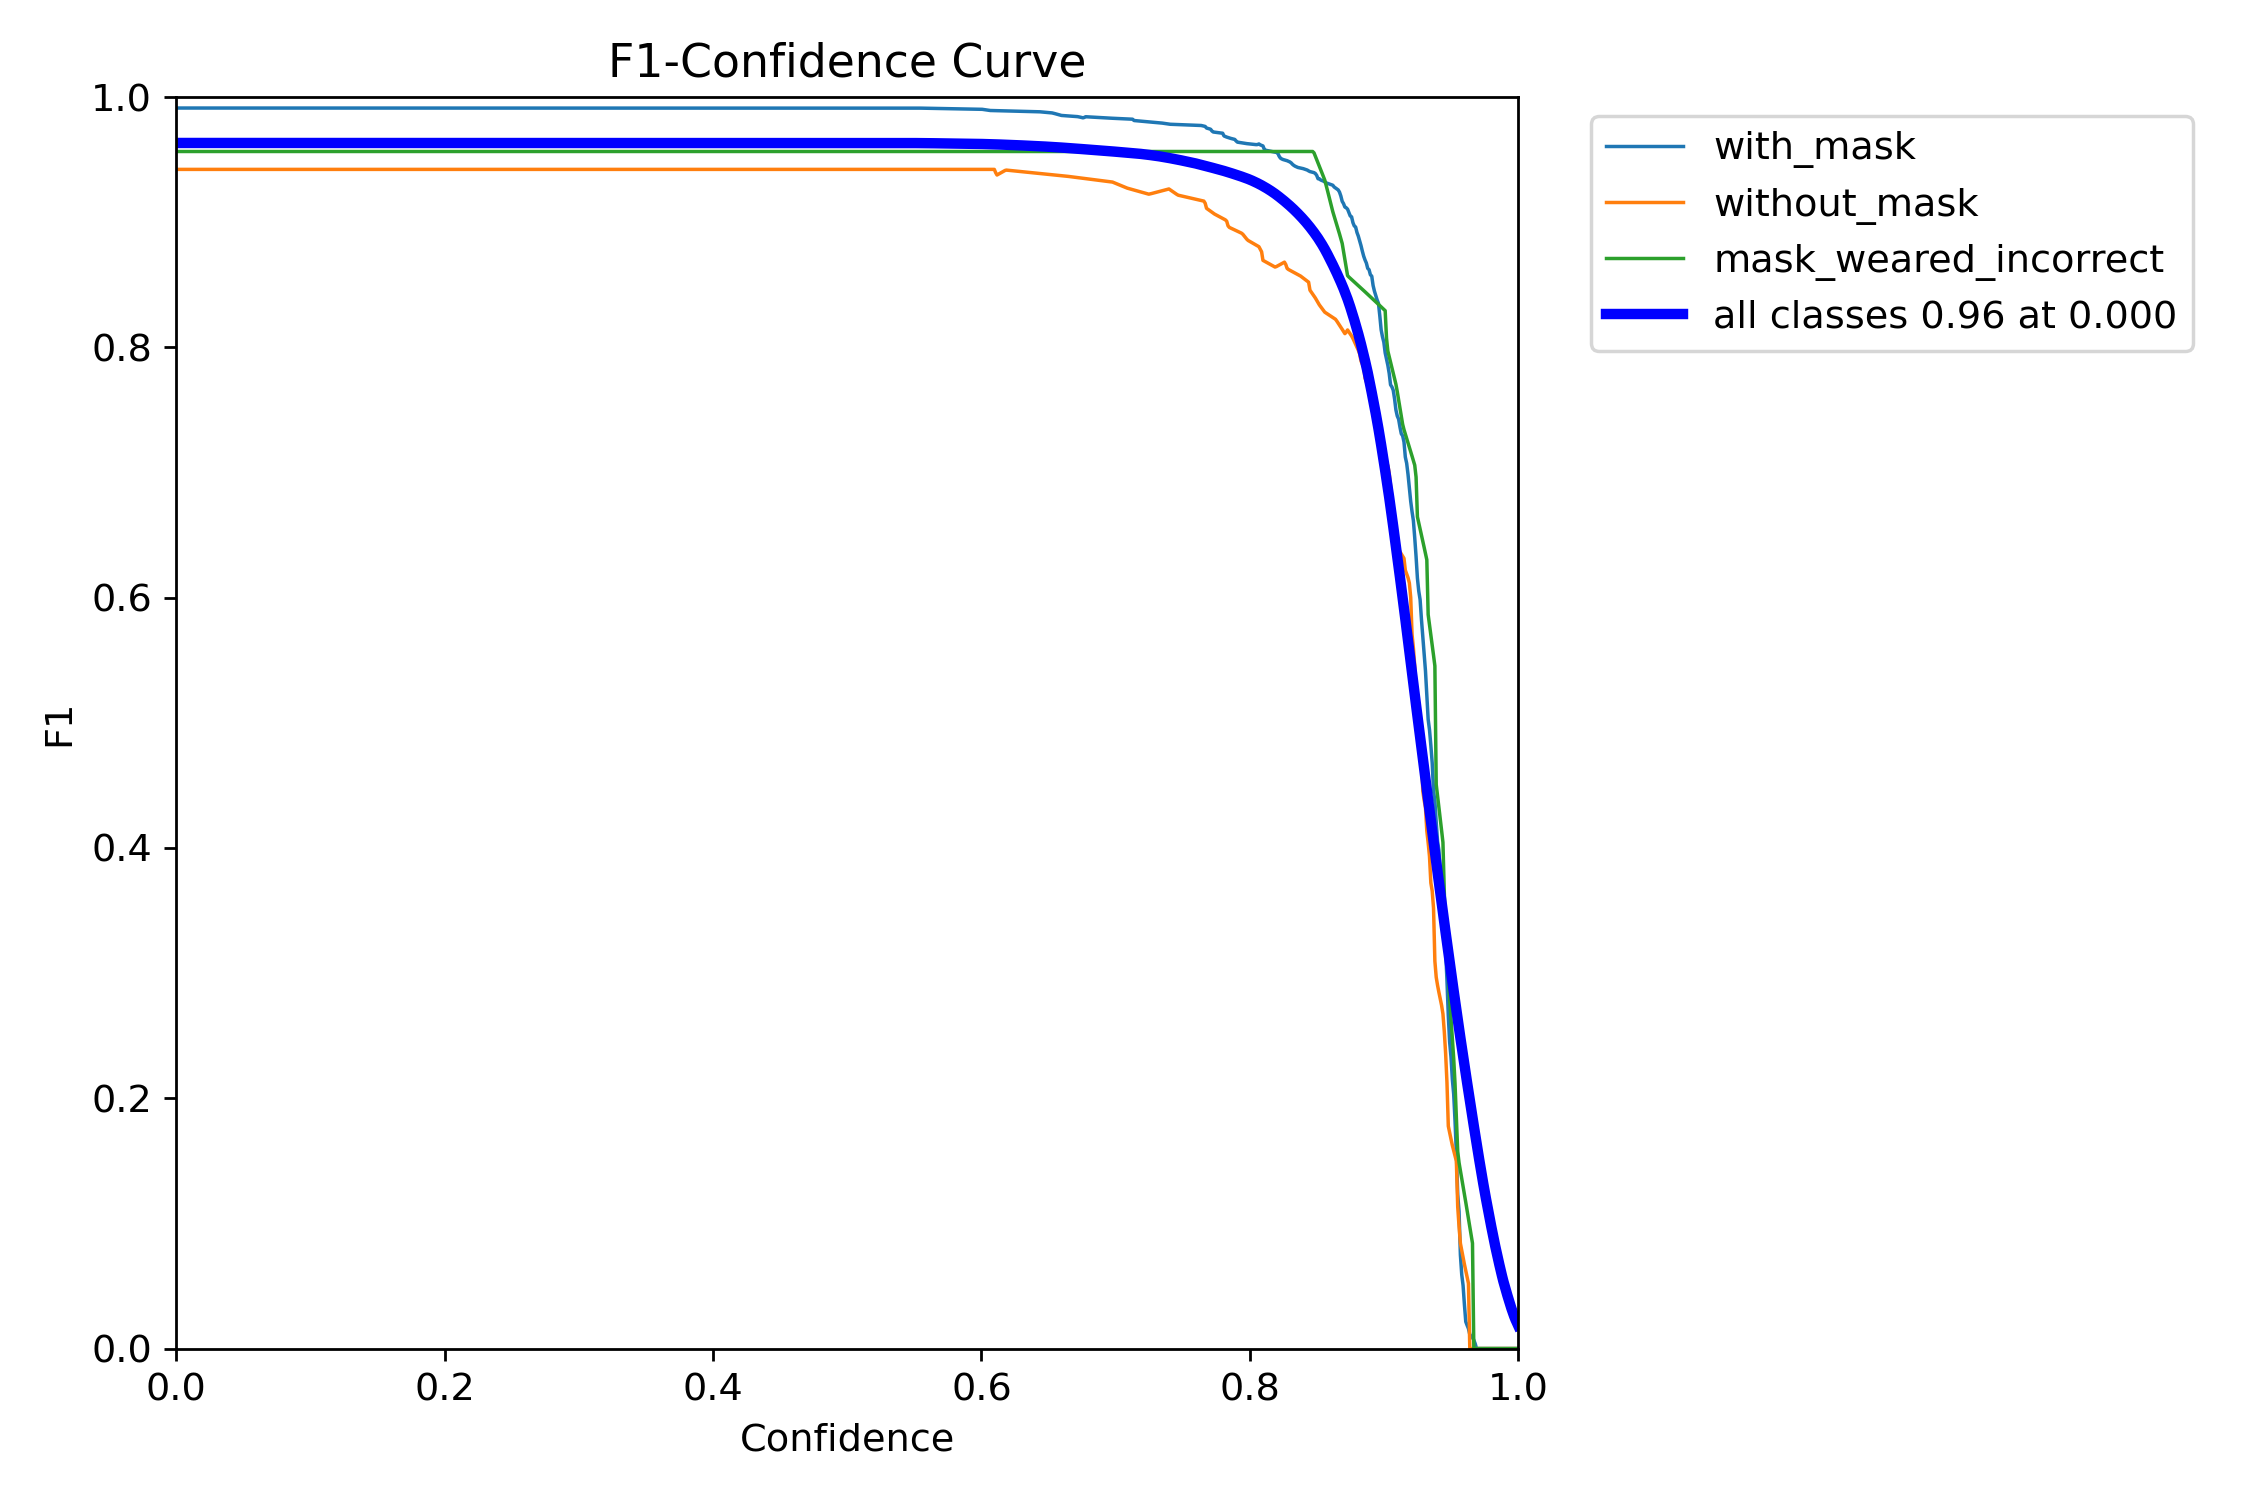

Showing: BoxPR_curve.png


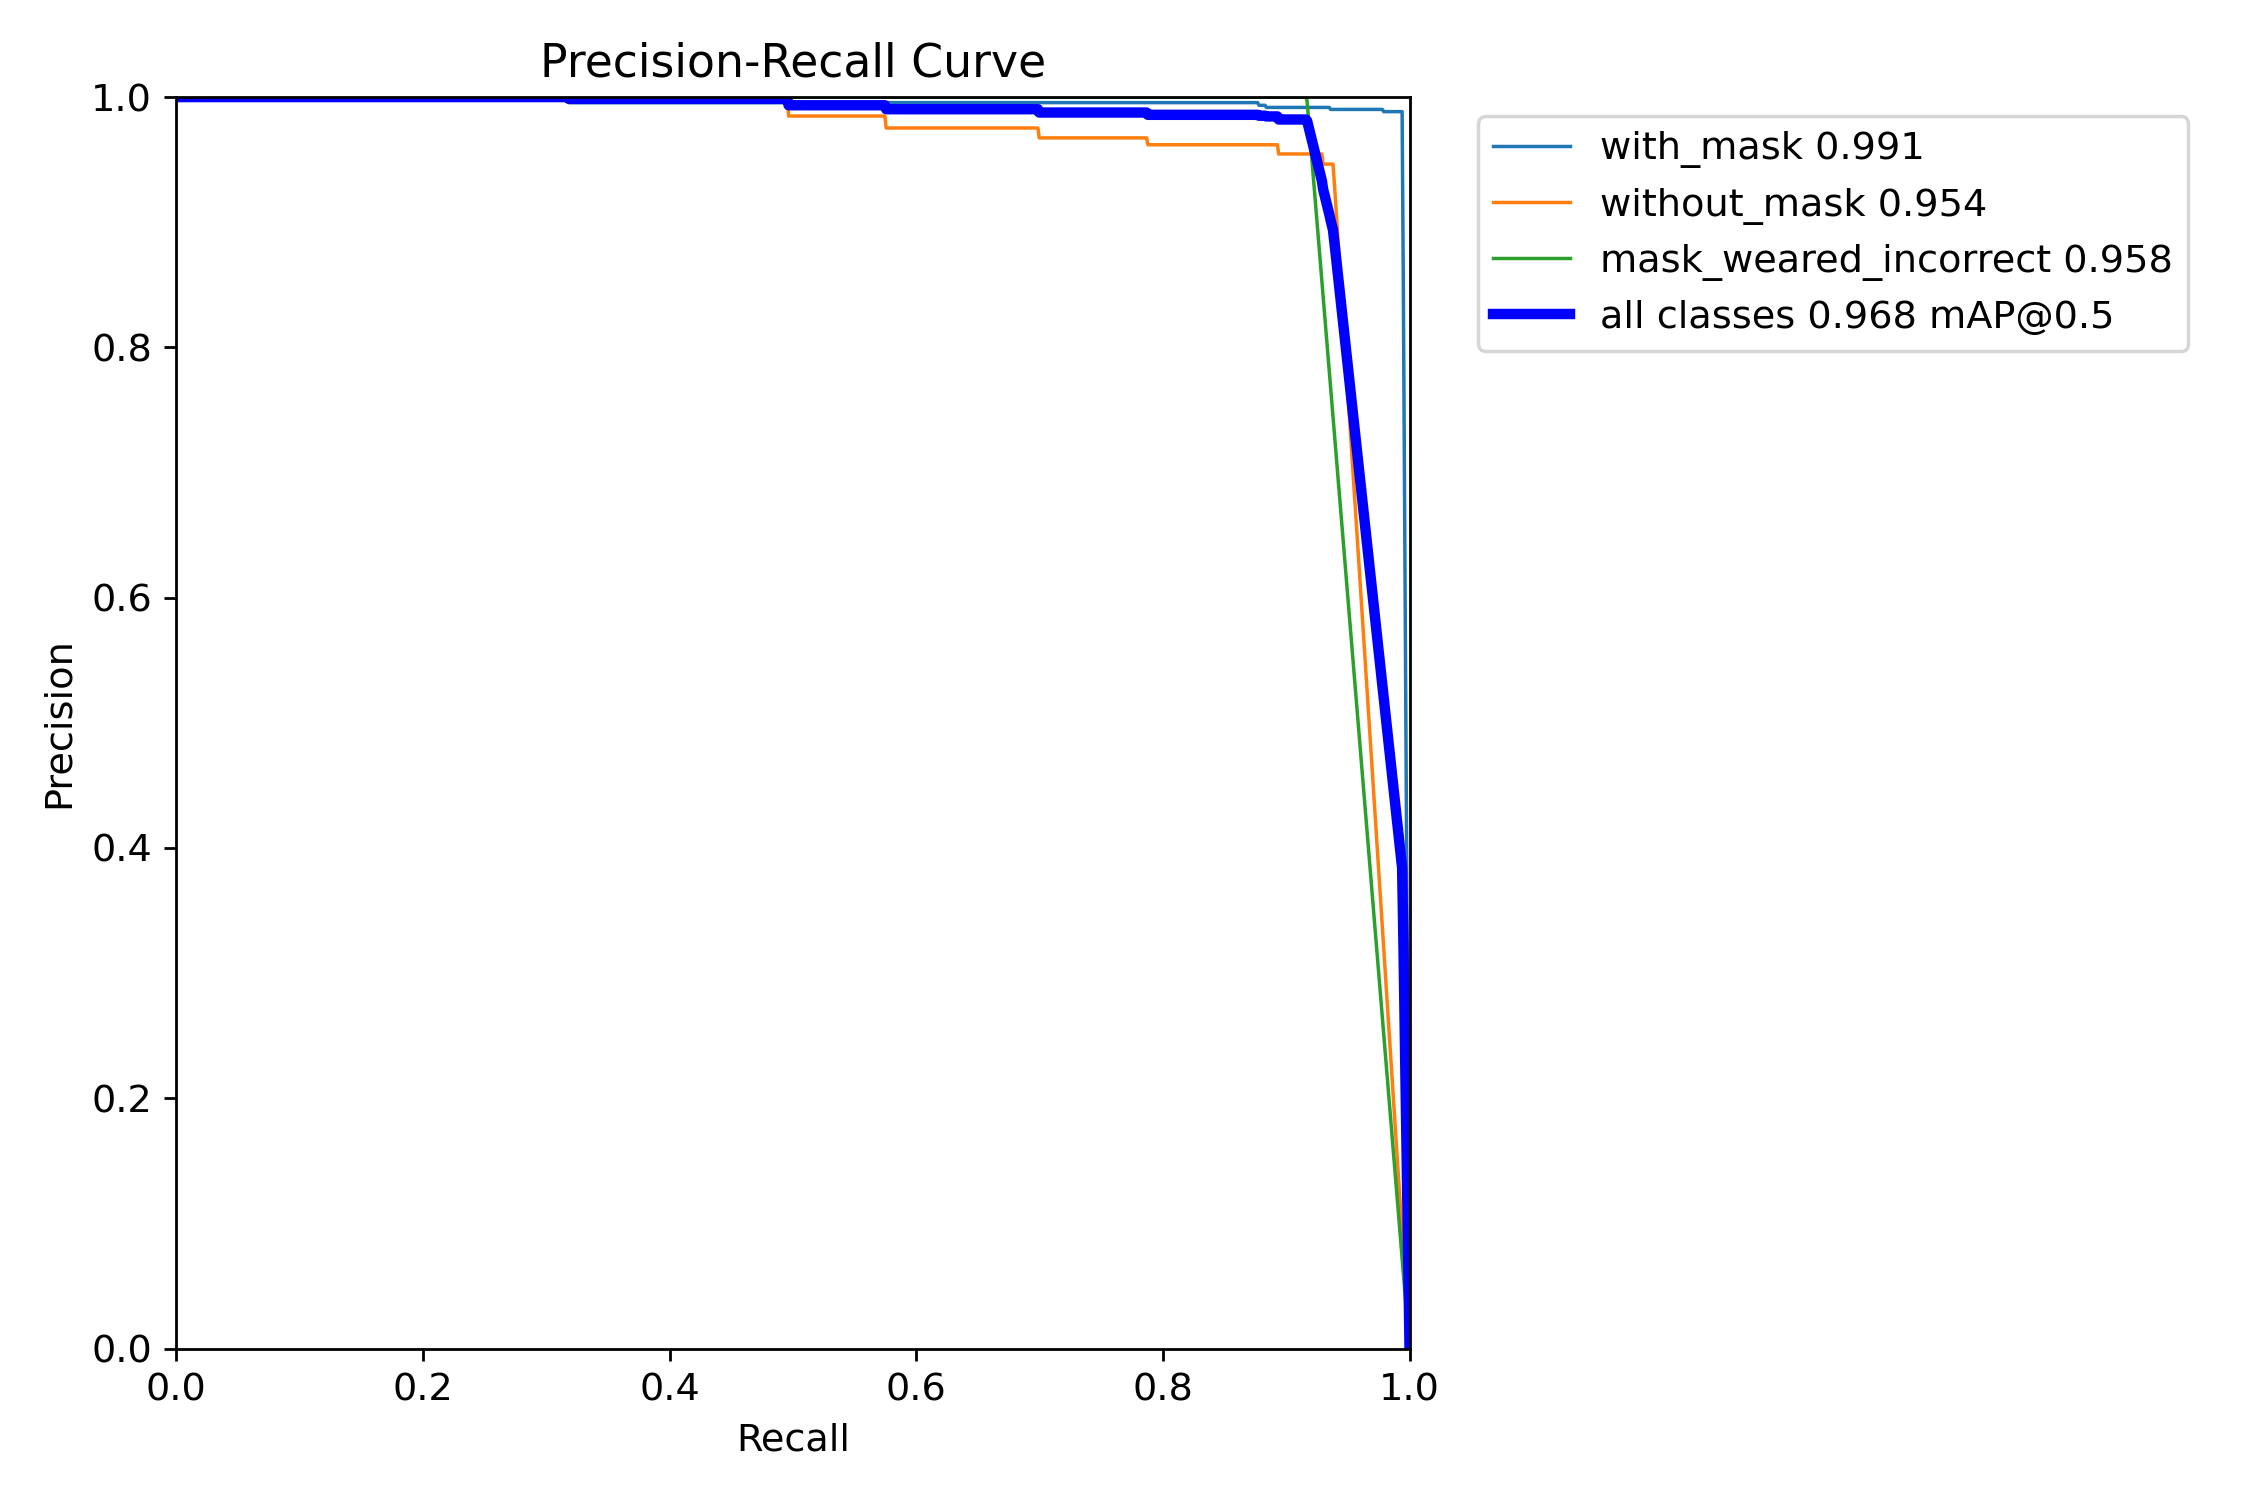

Showing: BoxP_curve.png


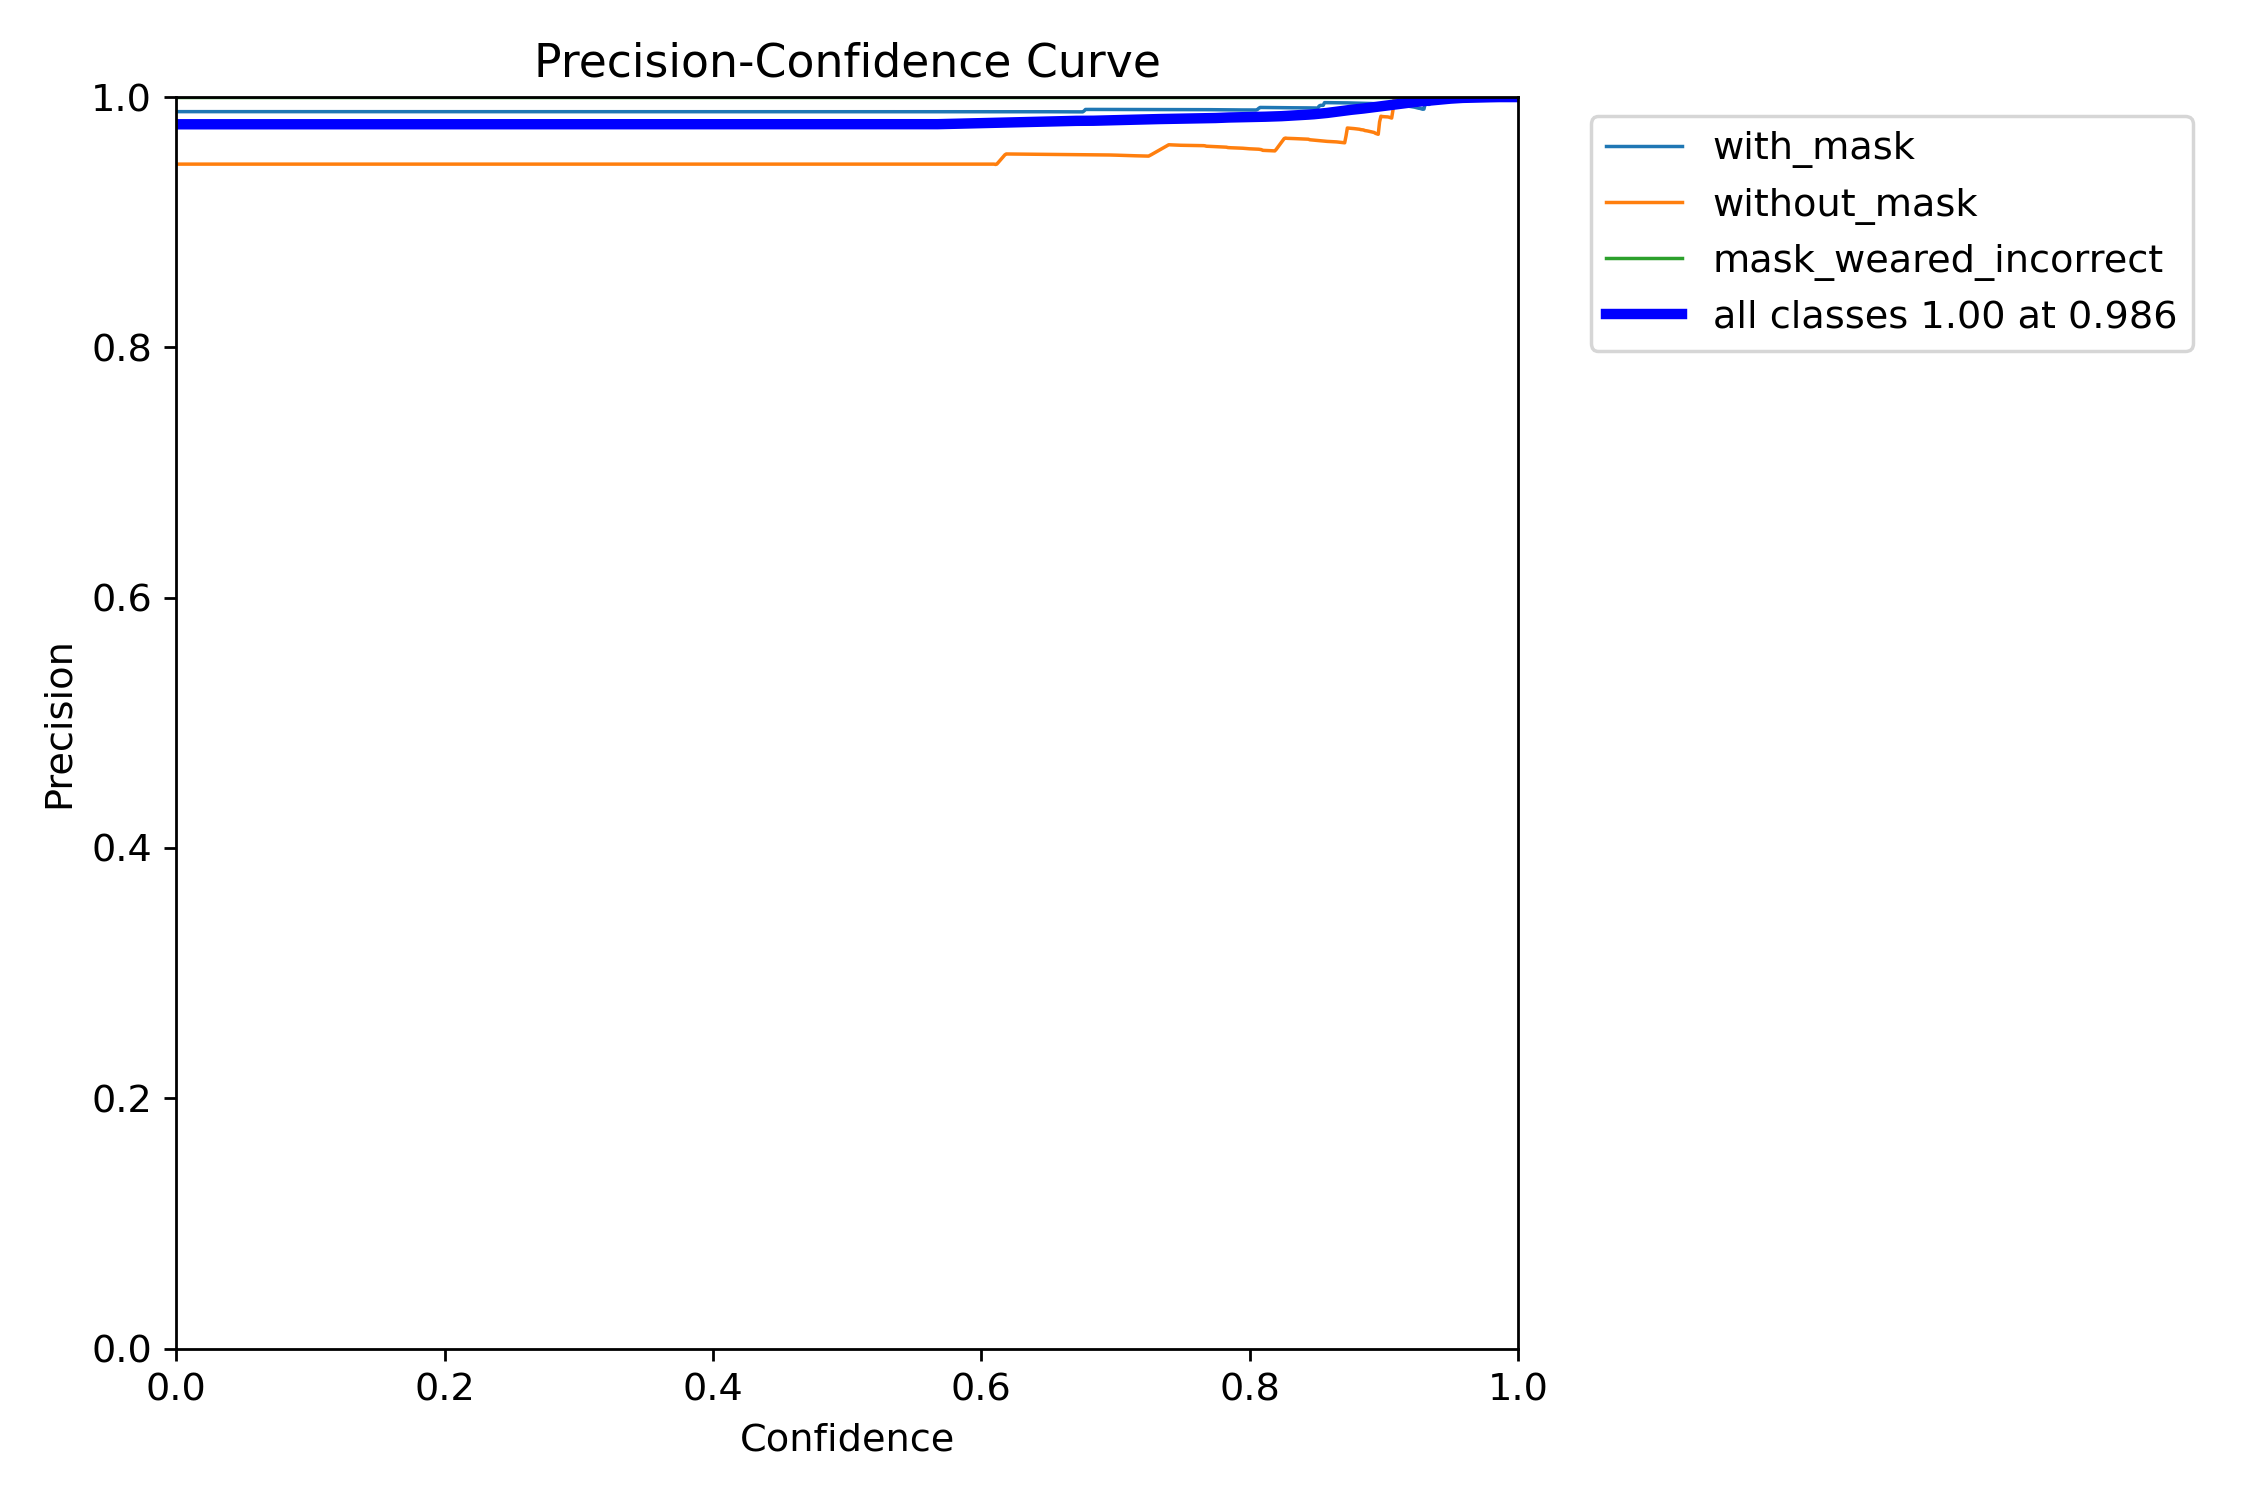

Showing: BoxR_curve.png


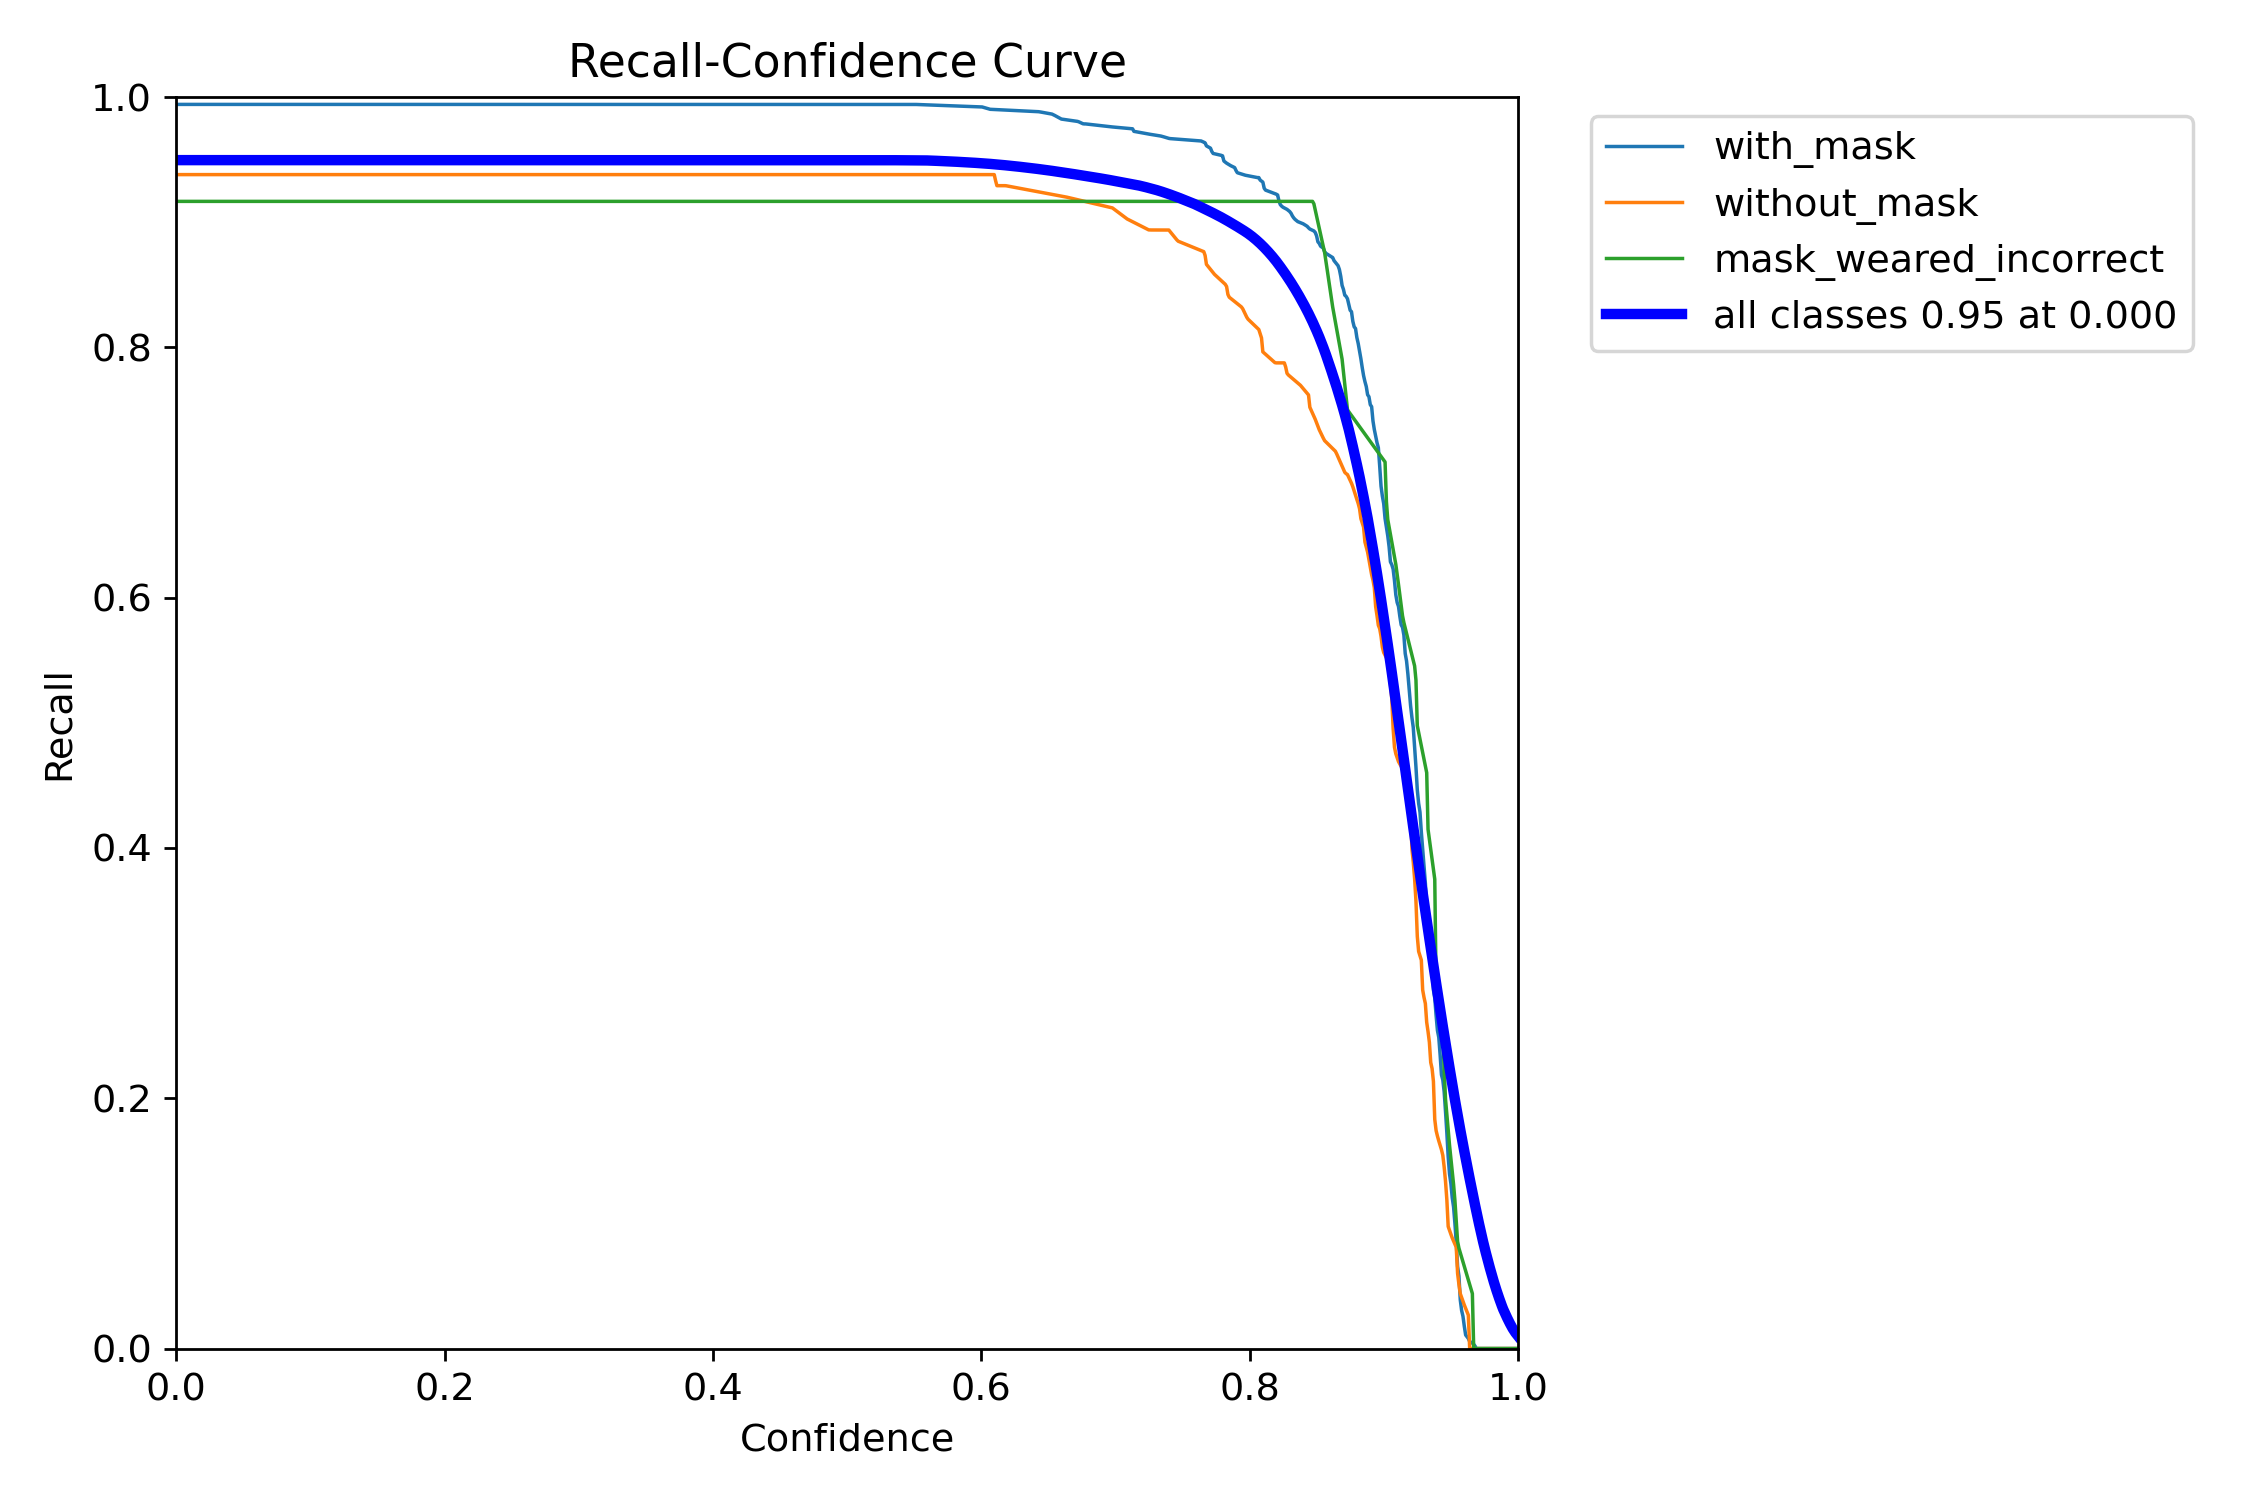

Showing: confusion_matrix.png


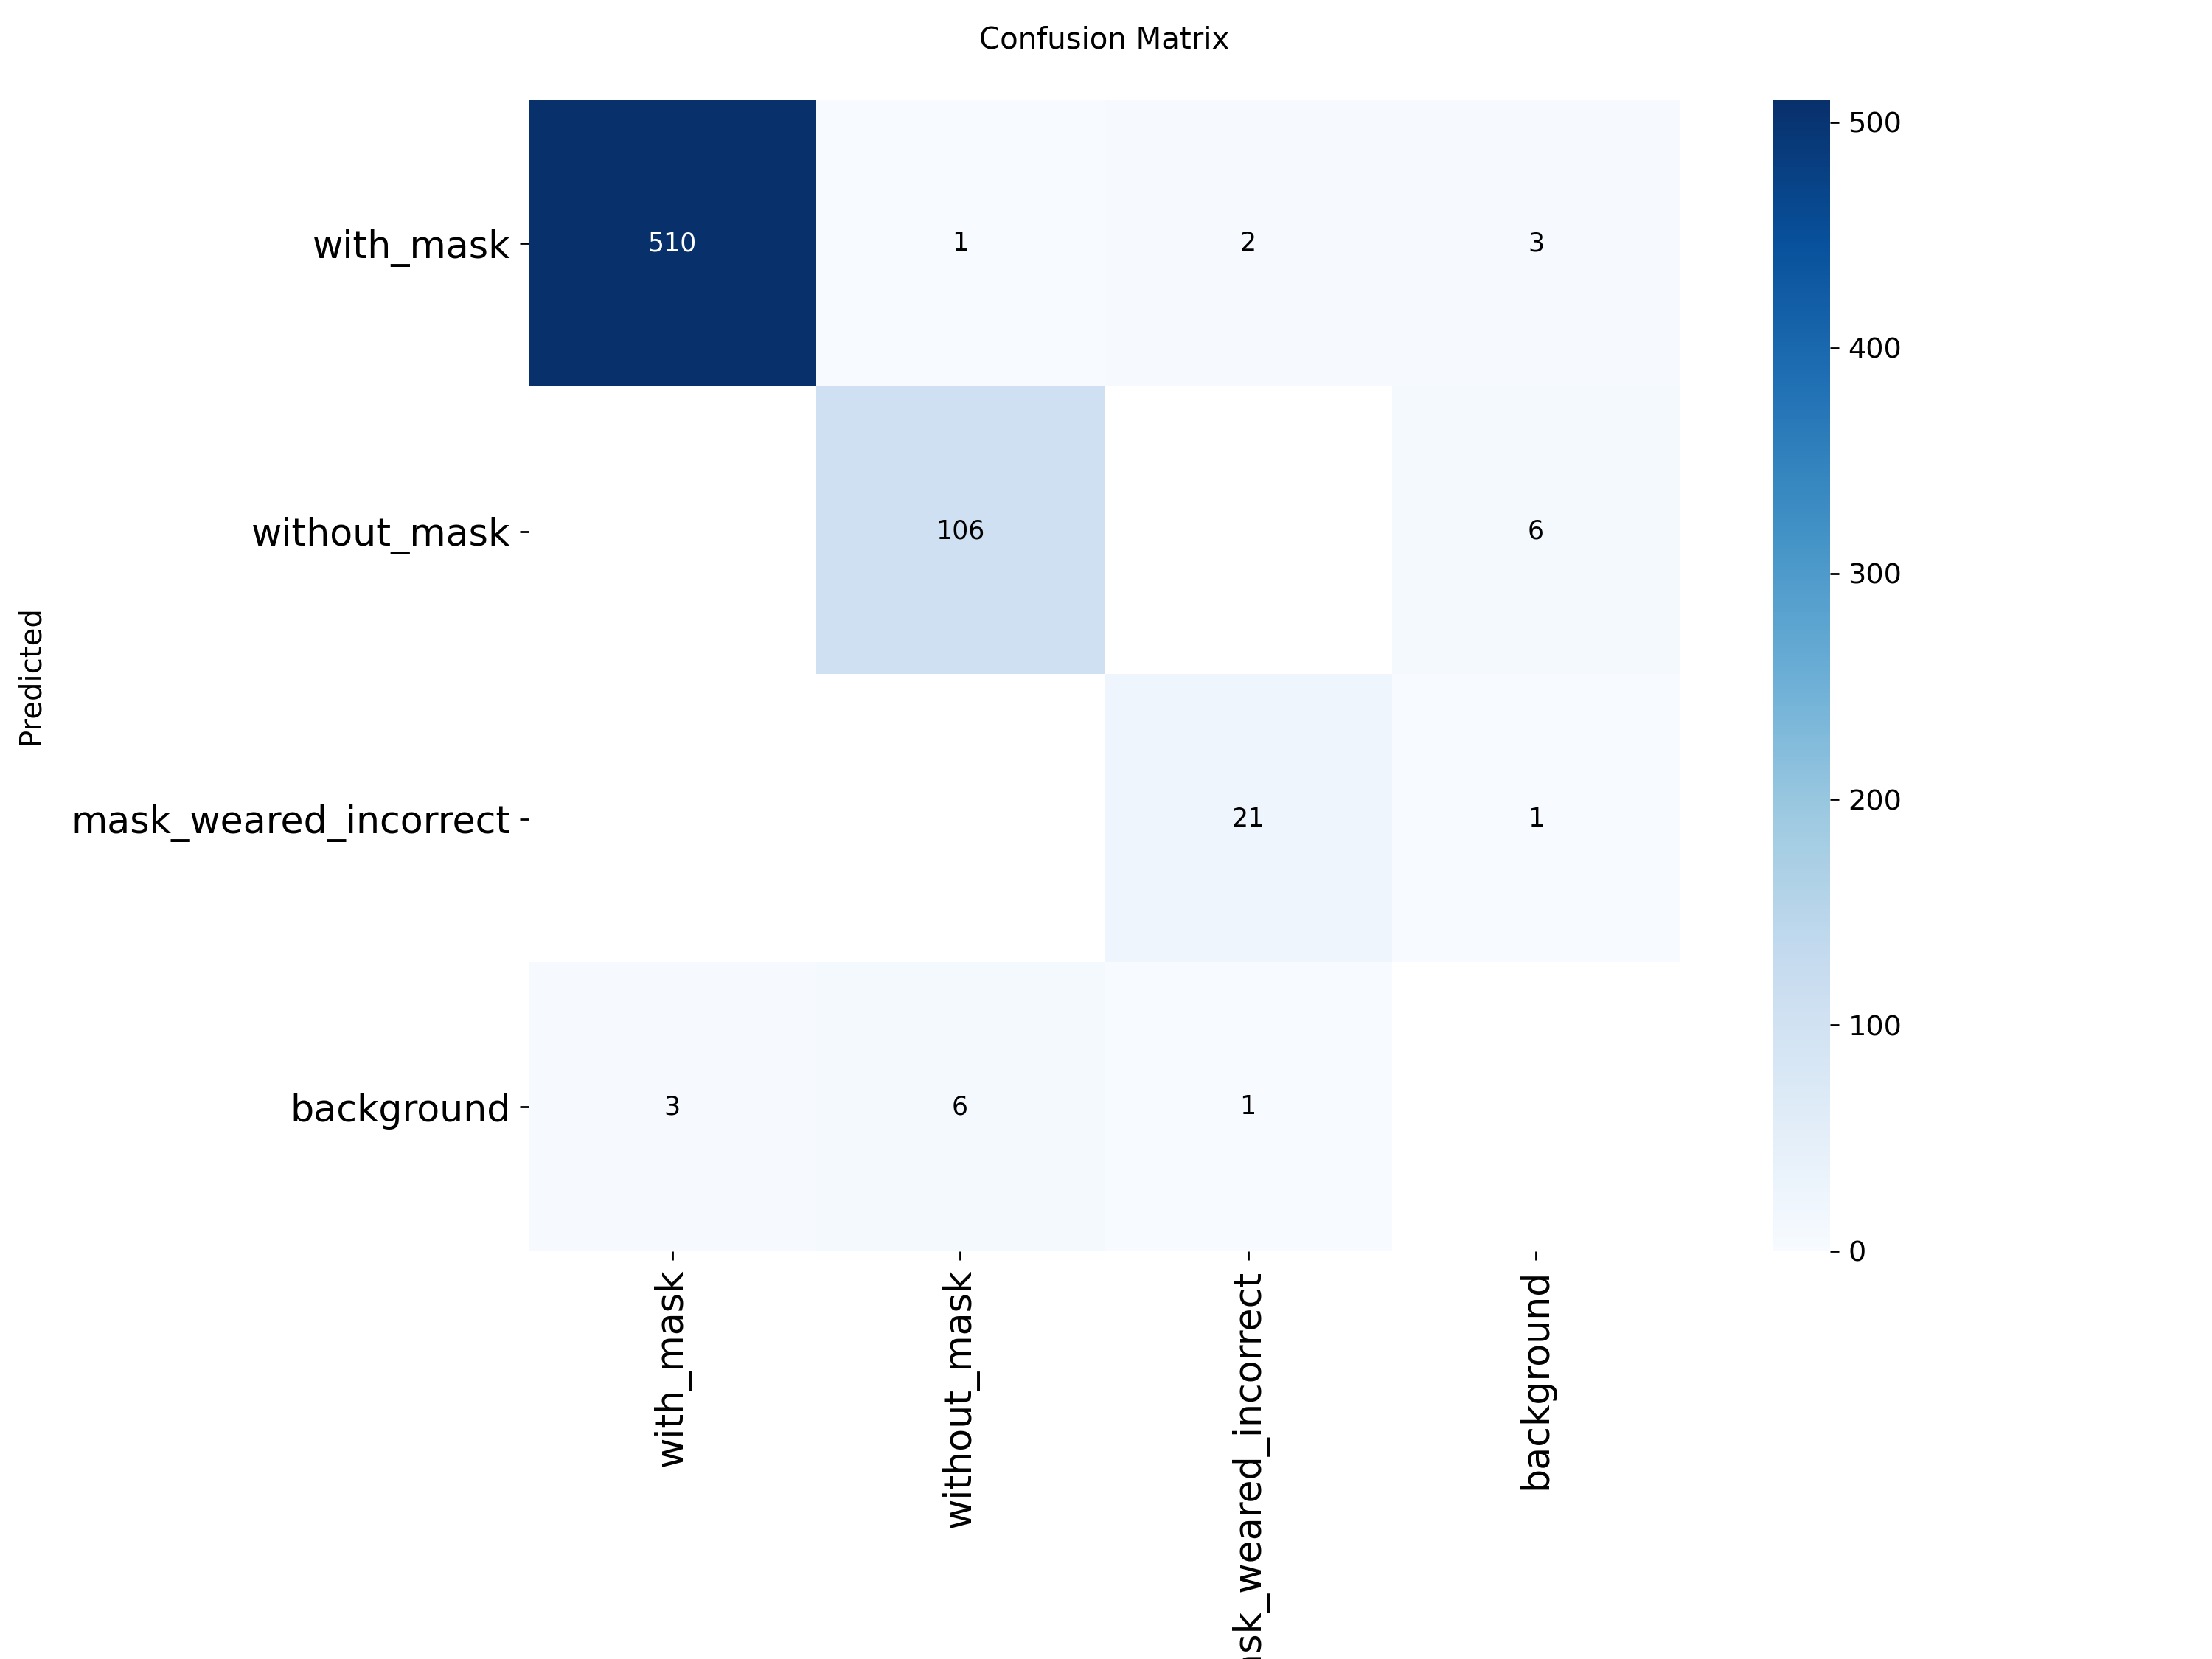

In [4]:
import os
from IPython.display import Image, display

RESULT_DIR = "/content/drive/MyDrive/Face_mask_project/results/test_check"

datas_to_show = [
    "BoxF1_curve.png",
    "BoxPR_curve.png",
    "BoxP_curve.png",
    "BoxR_curve.png",
    "confusion_matrix.png",
]

for img_name in datas_to_show:
    img_path = os.path.join(RESULT_DIR, img_name)
    if os.path.exists(img_path):
        print(f"Showing: {img_name}")
        display(Image(filename=img_path))
    else:
        print(f"Not found: {img_path}")

Showing: val_batch0_pred.jpg


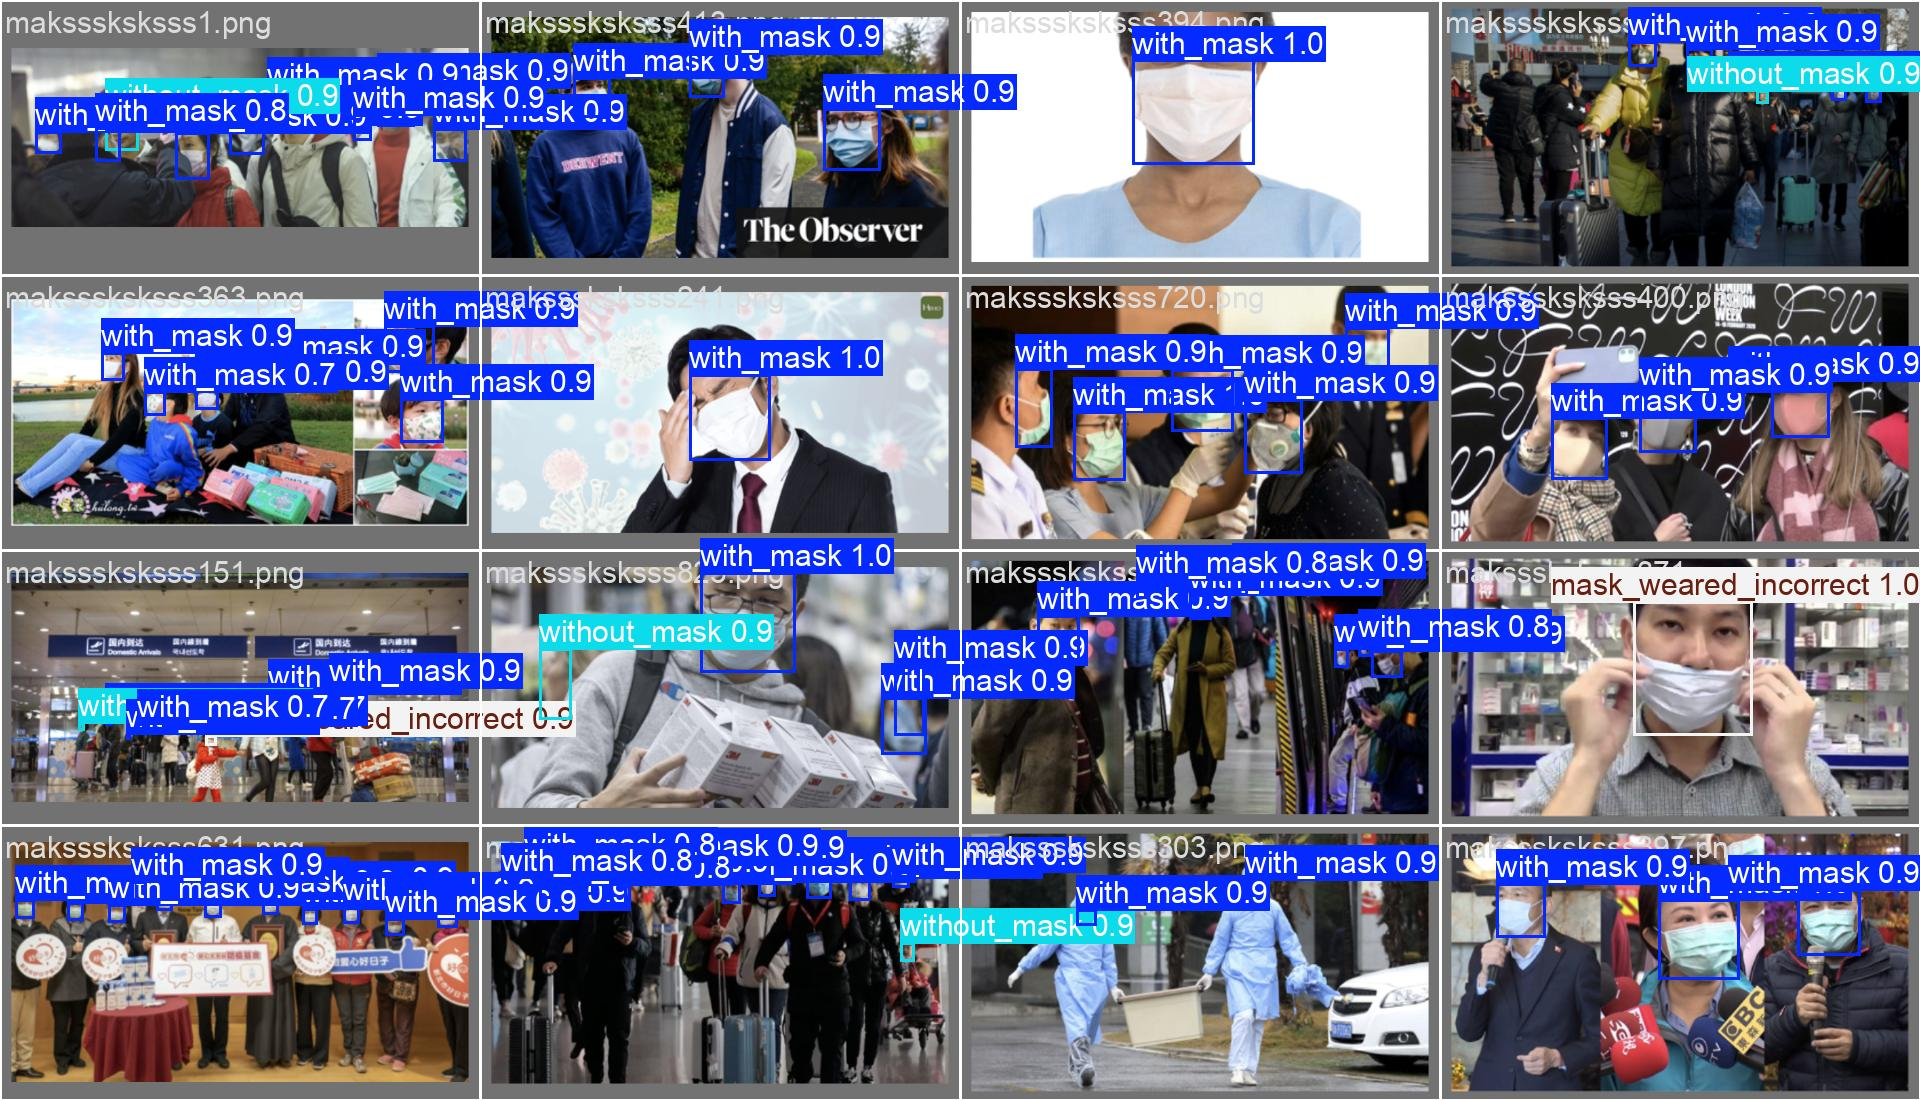

Showing: val_batch1_pred.jpg


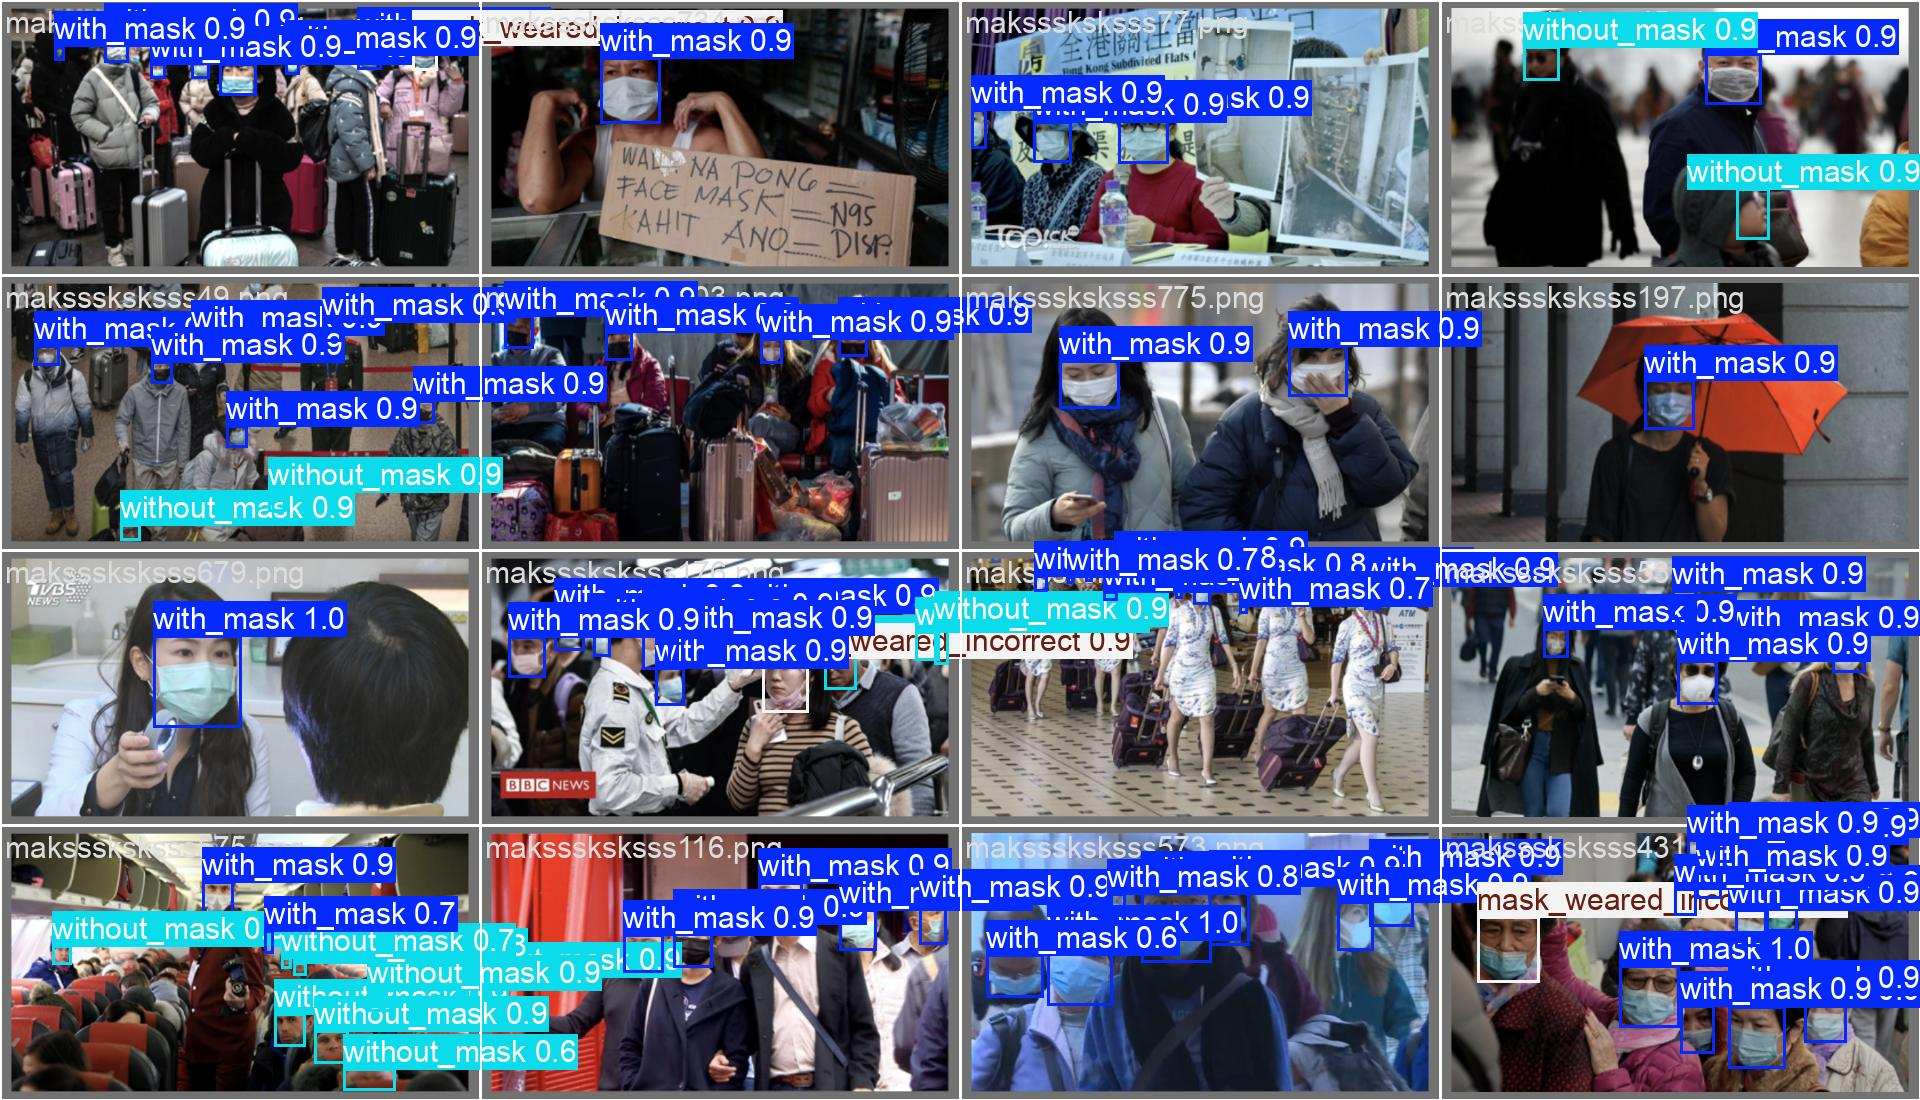

Showing: val_batch2_pred.jpg


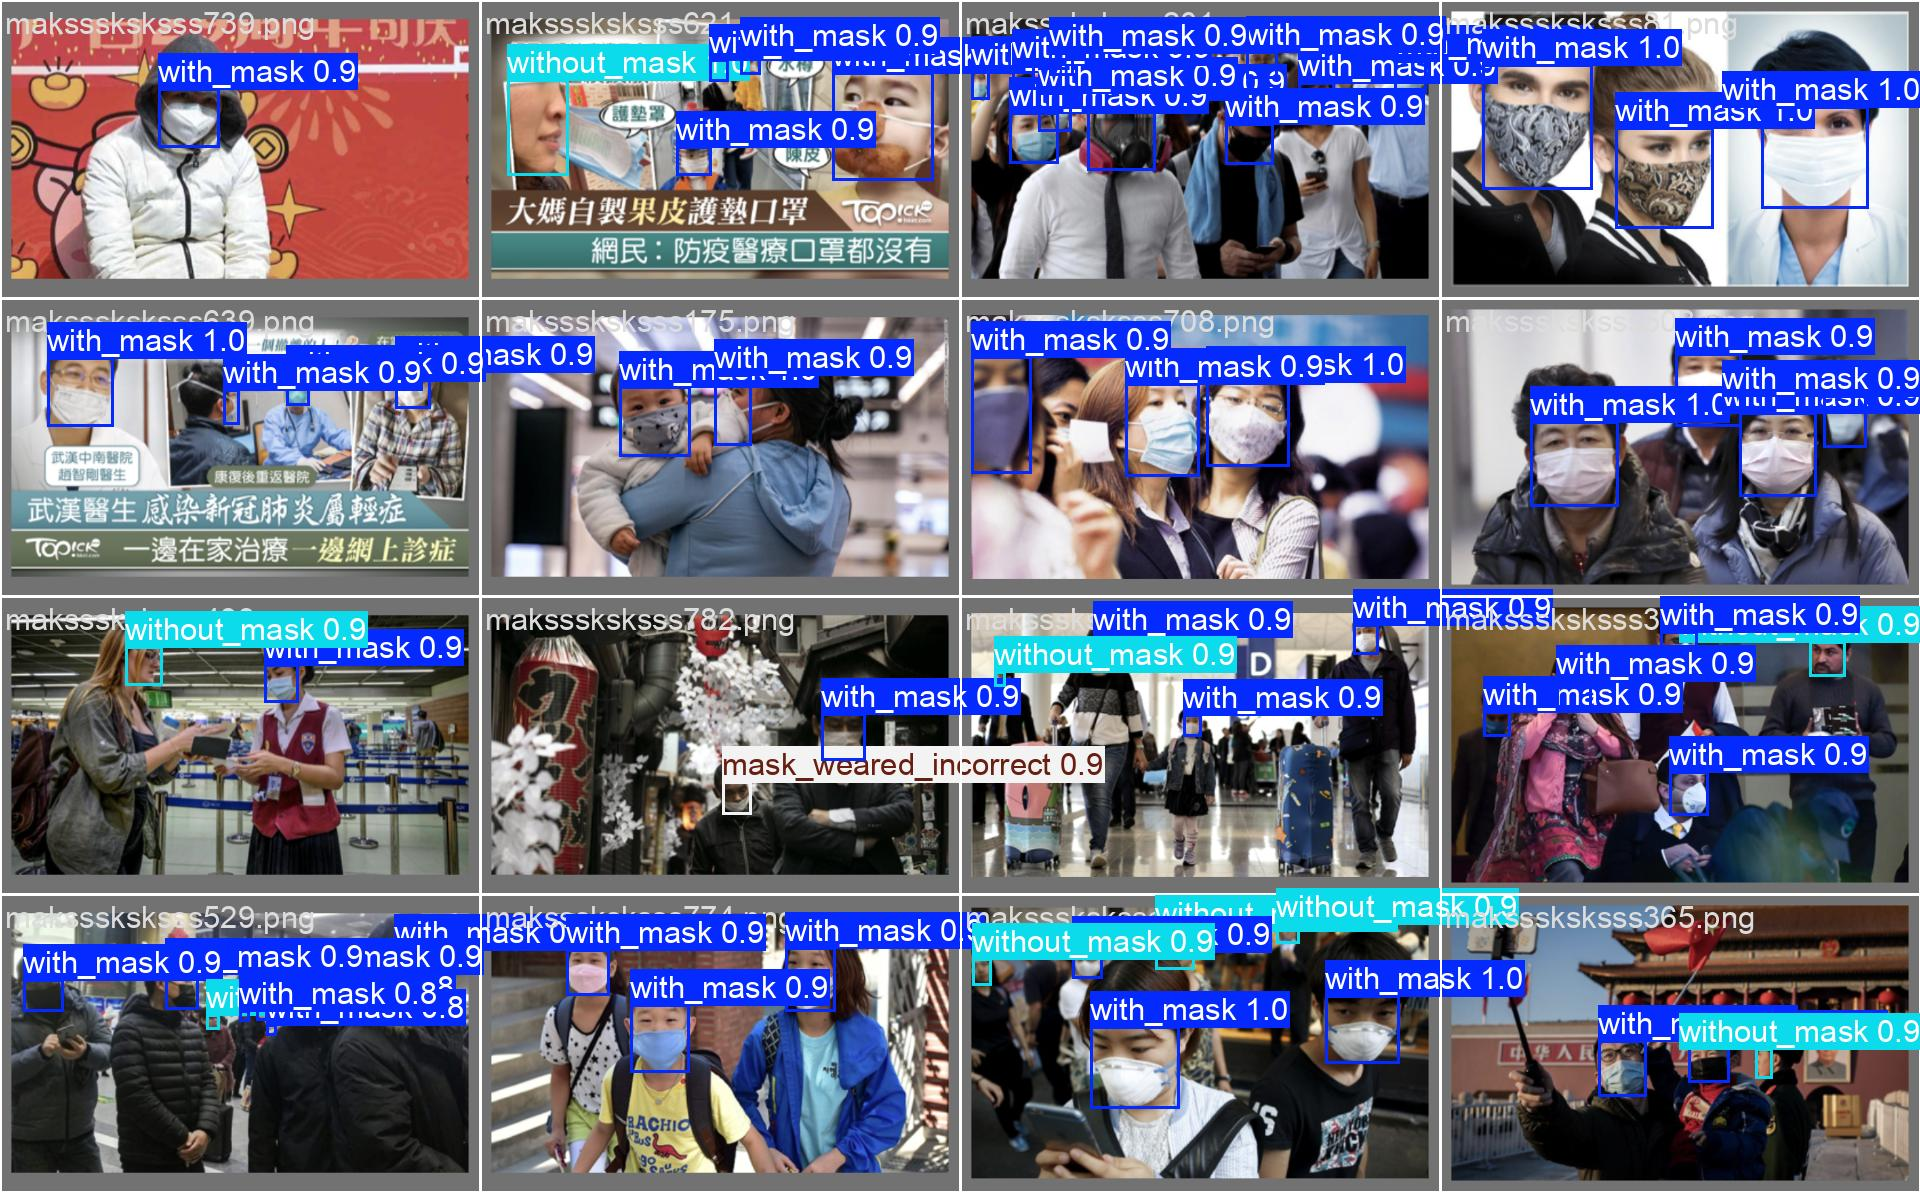

In [5]:
images_to_show = [
    "val_batch0_pred.jpg",
    "val_batch1_pred.jpg",
    "val_batch2_pred.jpg"
]

for img_name in images_to_show:
    img_path = os.path.join(RESULT_DIR, img_name)
    if os.path.exists(img_path):
        print(f"Showing: {img_name}")
        display(Image(filename=img_path))
    else:
        print(f"Not found: {img_path}")

Just use for downloading and run on PC/laptop, not in gg colab

In [ ]:
import cv2
from ultralytics import YOLO

#Change depends save link
model = YOLO("/content/drive/MyDrive/Face_mask_project/runs/train_yolov8s/weights/best.pt")

cap = cv2.VideoCapture(0)

#Set resolution
cap.set(3, 640)  # width
cap.set(4, 480)  # height


while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break


    results = model.predict(
        source=frame,
        conf=0.5,
        imgsz=512,
        verbose=False
    )

    annotated_frame = results[0].plot()
    cv2.imshow("YOLOv8 Real-Time Detection", annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

